<a href="https://colab.research.google.com/github/aakarsh31/AI-4.0/blob/main/Assignment-2/SE20UARI001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [36]:

ls

drive/  sample_data/


CODE INVOLVING ALL CLASSES

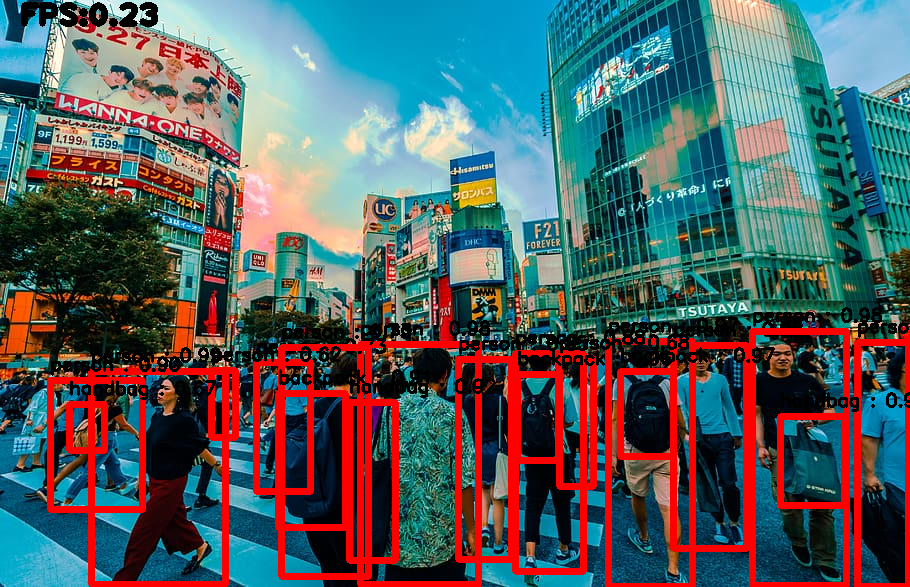

In [37]:

import cv2
import time
import numpy as np
from google.colab.patches import cv2_imshow

confidence = 0.6
Nms= 0.3
class_names = []
with open("/content/drive/MyDrive/YOLO/Copy of coco.names", "r") as f:
  class_names = [cname.strip() for cname in f.readlines()]

img = cv2.imread("/content/drive/MyDrive/YOLO/japan.jpg") #loading the picture
arc = cv2.dnn.readNet("/content/drive/MyDrive/YOLO/Copy of yolov4.weights","/content/drive/MyDrive/YOLO/Copy of yolov4.cfg") #loading the saved weights of the model
arc.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
arc.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA_FP16)
model = cv2.dnn_DetectionModel(arc)
model.setInputParams(size=(640,640), scale=1/255, swapRB=True)
x =time.time()
classes, scores, boxes = model.detect(img, confidence, Nms)
y= time.time()
fps=1/(y-x)

for (classid, score, box) in zip(classes, scores, boxes):
  if isinstance(classid, (list, np.ndarray)):
    classid_value = classid[0]
  else:
    classid_value = classid

  if isinstance(score, (list, np.ndarray)):
    score_value = score[0]
  else:
    score_value = score
    label = "%s : %.2f" % (class_names[classid_value], score_value)
    cv2.rectangle(img,box,color=(0, 0, 255),thickness=5)
    cv2.putText(img, label, (box[0],box[1]-10),cv2.FONT_HERSHEY_SIMPLEX,0.6,(0,0,0),2)
    cv2.putText(img, "FPS:{0:.2f}".format(fps),(20, 25), cv2.FONT_HERSHEY_PLAIN,fontScale=2,color=(0, 0, 0),thickness=5)
cv2_imshow(img)

CODE MODIFIED TO RECOGNIZE ONLY "PERSON" CLASS


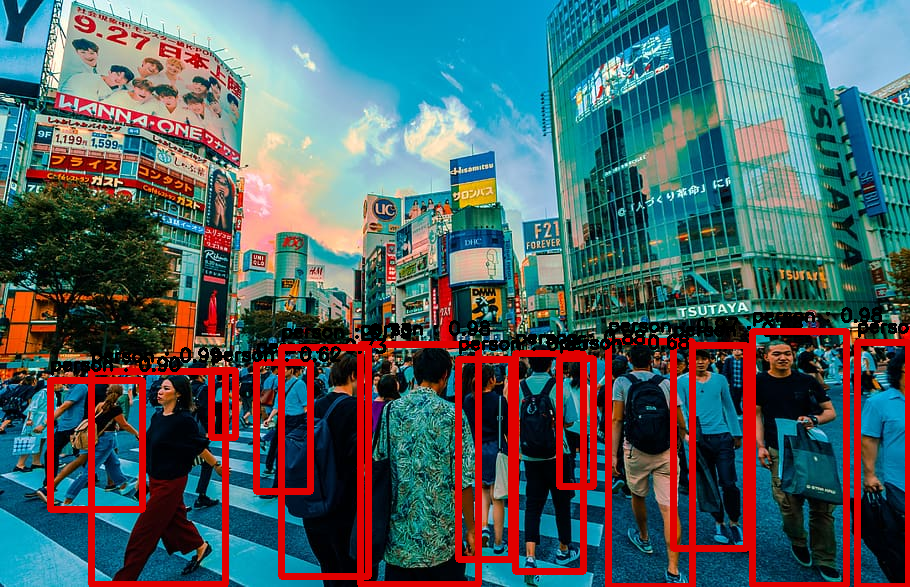

In [38]:

import cv2
import time
import numpy as np
from google.colab.patches import cv2_imshow

confidence = 0.6
Nms= 0.3
class_names = []
with open("/content/drive/MyDrive/YOLO/Copy of coco.names", "r") as f:
  class_names = [cname.strip() for cname in f.readlines()]

img = cv2.imread("/content/drive/MyDrive/YOLO/japan.jpg") #loading the picture
arc = cv2.dnn.readNet("/content/drive/MyDrive/YOLO/Copy of yolov4.weights","/content/drive/MyDrive/YOLO/Copy of yolov4.cfg") #loading the saved weights of the model
arc.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
arc.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA_FP16)
model = cv2.dnn_DetectionModel(arc)
model.setInputParams(size=(640,640), scale=1/255, swapRB=True)
x =time.time()
classes, scores, boxes = model.detect(img, confidence, Nms)
y= time.time()
fps=1/(y-x)

#modifying the code so that only people are deteched
classes, scores, boxes = model.detect(img, confidence, Nms)
for (classid, score, box) in zip(classes, scores, boxes):
        label = "%s : %.2f" % (class_names[classid],score)
        if class_names[classid] == 'person':
          cv2.rectangle(img,box,color=(0, 0, 225),thickness=5)
          cv2.putText(img, label, (box[0],box[1]-10),cv2.FONT_HERSHEY_SIMPLEX,0.6,(0,0,0),2)

cv2_imshow(img) #displaying the image